In [15]:
!rm -rf /content/sample_data/train/.ipynb_checkpoints

In [41]:
import torch
import torchvision
from torchvision import transforms
from torch.utils import data
train_data_path = "/content/sample_data/train"
transforms = transforms.Compose([
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225]),
    transforms.ToTensor(),
    transforms.Resize(64)
])
train_data = torchvision.datasets.ImageFolder(root=train_data_path,transform=transforms)

In [84]:
import torchvision
from torchvision import transforms
train_data_path = "/content/sample_data/train"
transforms = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
])
train_data = torchvision.datasets.ImageFolder(root=train_data_path,transform=transforms)
train_loader = data.DataLoader(train_data,batch_size=32,shuffle=True)

In [85]:
val_data_path = "/content/sample_data/val"
!rm -rf /content/sample_data/val/.ipynb_checkpoints
val_data = torchvision.datasets.ImageFolder(root=val_data_path,transform=transforms)
val_loader = data.DataLoader(val_data,batch_size=32,shuffle=True)

In [34]:
test_data_path = "/content/sample_data/test"
!rm -rf /content/sample_data/test/.ipynb_checkpoints
test_data = torchvision.datasets.ImageFolder(root=test_data_path,transform=transforms)
test_loader = data.DataLoader(test_data,batch_size=32)

In [86]:
#creating deep neuralnetwork
import torch.nn as nn
import torch.nn.functional as F
class SimpleNet(nn.Module):
  def __init__(self):
    super(SimpleNet,self).__init__()
    self.fc1 = nn.Linear(12288,84)
    self.fc2 = nn.Linear(84,50)
    self.fc3 = nn.Linear(50,2)
  def forward(self,x):
    x = x.view(-1,12288)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
simplenet = SimpleNet()

In [44]:
#optimizer
import torch.optim as optim
optimizer = optim.Adam(simplenet.parameters(),lr=0.001)

In [59]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

In [103]:
def train(model,optimizer,loss_fn,train_loader,val_loader,epochs=20,device="cpu"):
  for epoch in range(epochs):
    training_loss = 0.0
    valid_loss = 0.0
    model.train()
    for batch in train_loader:
      optimizer.zero_grad()
      inputs,targets = batch
      inputs = inputs.to(device)
      targets = targets.to(device)
      output = model(inputs)
      loss = loss_fn(output,targets)
      loss.backward()
      optimizer.step()
      training_loss += loss.data.item()
    training_loss /= len(train_loader)

    model.eval()
    num_correct=0
    num_examples =0
    for batch in val_loader:
      inputs,targets = batch
      inputs = inputs.to(device)
      output = model(inputs)
      targets = targets.to(device)
      loss = loss_fn(output,targets)
      valid_loss += loss.data.item()
      correct = torch.eq(torch.max(F.softmax(output,dim=1),dim=1)[1],targets).view(-1)
      num_correct += torch.sum(correct).item()
      num_examples += correct.shape[0]
    valid_loss /= len(val_loader)
    print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch,training_loss,valid_loss,num_correct/num_examples))

In [104]:
train(simplenet,optimizer,torch.nn.CrossEntropyLoss(),train_loader,val_loader,device='cpu')

Epoch: 0, Training Loss: 0.67, Validation Loss: 0.79, accuracy = 0.30
Epoch: 1, Training Loss: 0.67, Validation Loss: 0.79, accuracy = 0.30
Epoch: 2, Training Loss: 0.68, Validation Loss: 0.79, accuracy = 0.30
Epoch: 3, Training Loss: 0.67, Validation Loss: 0.80, accuracy = 0.30
Epoch: 4, Training Loss: 0.67, Validation Loss: 0.79, accuracy = 0.30
Epoch: 5, Training Loss: 0.67, Validation Loss: 0.79, accuracy = 0.30
Epoch: 6, Training Loss: 0.67, Validation Loss: 0.80, accuracy = 0.30
Epoch: 7, Training Loss: 0.67, Validation Loss: 0.79, accuracy = 0.30
Epoch: 8, Training Loss: 0.67, Validation Loss: 0.79, accuracy = 0.30
Epoch: 9, Training Loss: 0.67, Validation Loss: 0.79, accuracy = 0.30
Epoch: 10, Training Loss: 0.67, Validation Loss: 0.79, accuracy = 0.30
Epoch: 11, Training Loss: 0.67, Validation Loss: 0.78, accuracy = 0.30
Epoch: 12, Training Loss: 0.68, Validation Loss: 0.79, accuracy = 0.30
Epoch: 13, Training Loss: 0.67, Validation Loss: 0.79, accuracy = 0.30
Epoch: 14, Train

In [56]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
  for epoch in range(epochs):
    training_loss = 0.0
    valid_loss = 0.0
    model.train()
    for batch in train_loader:
      optimizer.zero_grad()
      inputs, targets = batch # Unpack the batch into inputs and targets
      inputs = inputs.to(device) # Send inputs to the device
      targets = targets.to(device) # Send targets to the device
      output = model(inputs) # Pass inputs to the model
      loss = loss_fn(output, targets) # Calculate the loss
      loss.backward() # Backpropagate the loss
      optimizer.step() # Update the model's parameters
      training_loss += loss.data.item() # Accumulate the training loss
    training_loss /= len(train_loader) # Average the training loss

    model.eval()
    num_correct = 0
    num_examples = 0
    for batch in val_loader:
      inputs, targets = batch # Unpack the batch into inputs and targets
      inputs = inputs.to(device) # Send inputs to the device
      output = model(inputs) # Pass inputs to the model
      targets = targets.to(device) # Send targets to the device
      loss = loss_fn(output, targets) # Calculate the loss
      valid_loss += loss.data.item() # Accumulate the validation loss
      correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets).view(-1) # Calculate correct predictions
      num_correct += torch.sum(correct).item() # Accumulate the number of correct predictions
      num_examples += correct.shape[0] # Accumulate the total number of examples
    valid_loss /= len(val_loader) # Average the validation loss
    print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss, valid_loss, num_correct / num_examples)) # Print the epoch statistics

In [58]:
train(simplenet,optimizer,torch.nn.CrossEntropyLoss(),train_loader,val_loader,epochs=120)

Epoch: 0, Training Loss: 0.13, Validation Loss: 1.80, accuracy = 0.49
Epoch: 1, Training Loss: 0.10, Validation Loss: 1.92, accuracy = 0.40
Epoch: 2, Training Loss: 0.10, Validation Loss: 1.83, accuracy = 0.46
Epoch: 3, Training Loss: 0.08, Validation Loss: 1.89, accuracy = 0.42
Epoch: 4, Training Loss: 0.08, Validation Loss: 2.68, accuracy = 0.37
Epoch: 5, Training Loss: 0.13, Validation Loss: 2.33, accuracy = 0.39
Epoch: 6, Training Loss: 0.12, Validation Loss: 2.23, accuracy = 0.38
Epoch: 7, Training Loss: 0.10, Validation Loss: 2.40, accuracy = 0.42
Epoch: 8, Training Loss: 0.08, Validation Loss: 2.34, accuracy = 0.42
Epoch: 9, Training Loss: 0.08, Validation Loss: 2.35, accuracy = 0.41
Epoch: 10, Training Loss: 0.05, Validation Loss: 2.39, accuracy = 0.42
Epoch: 11, Training Loss: 0.05, Validation Loss: 2.38, accuracy = 0.46
Epoch: 12, Training Loss: 0.03, Validation Loss: 2.39, accuracy = 0.45
Epoch: 13, Training Loss: 0.04, Validation Loss: 1.84, accuracy = 0.56
Epoch: 14, Train

In [ ]:
# for epoch in range(epochs):
#   for batch in train_loader:
#     optimizer.zero_grad()
#     loss = loss_fn(simplenet(batch),labels)
#     loss.backward()
#     optimizer.step()

In [63]:
#trying to change lr to 0.1
optimizer = optim.Adam(simplenet.parameters(),lr=0.1)

In [66]:
train(simplenet,optimizer,torch.nn.CrossEntropyLoss(),train_loader,test_loader,epochs=20)

Epoch: 0, Training Loss: 0.63, Validation Loss: 54.92, accuracy = 0.53
Epoch: 1, Training Loss: 0.63, Validation Loss: 54.93, accuracy = 0.53
Epoch: 2, Training Loss: 0.63, Validation Loss: 54.93, accuracy = 0.53
Epoch: 3, Training Loss: 0.63, Validation Loss: 54.93, accuracy = 0.53
Epoch: 4, Training Loss: 0.62, Validation Loss: 54.93, accuracy = 0.53
Epoch: 5, Training Loss: 0.63, Validation Loss: 54.93, accuracy = 0.53
Epoch: 6, Training Loss: 0.63, Validation Loss: 54.92, accuracy = 0.53
Epoch: 7, Training Loss: 0.63, Validation Loss: 54.92, accuracy = 0.53
Epoch: 8, Training Loss: 0.63, Validation Loss: 54.92, accuracy = 0.53
Epoch: 9, Training Loss: 0.62, Validation Loss: 54.92, accuracy = 0.53
Epoch: 10, Training Loss: 0.63, Validation Loss: 54.92, accuracy = 0.53
Epoch: 11, Training Loss: 0.63, Validation Loss: 54.92, accuracy = 0.53
Epoch: 12, Training Loss: 0.63, Validation Loss: 54.92, accuracy = 0.53
Epoch: 13, Training Loss: 0.62, Validation Loss: 54.93, accuracy = 0.53
Ep

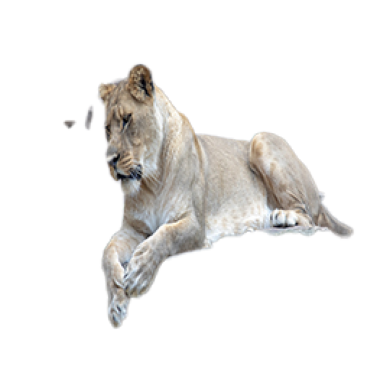

In [72]:
from PIL import Image
import matplotlib.pyplot as plt

labels = ['lion','tiger']
img = Image.open("/content/sample_data/test/class_1/180.png")
plt.imshow(img)  # Display the image
plt.axis("off")  # Hide axes
plt.show()

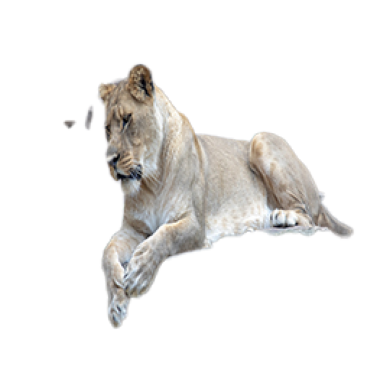

TypeError: 'module' object is not callable

In [108]:
# img=transforms(img)
# img=img.unsqueeze(0)
# prediction = simplenet(img)
# prediction = prediction.argmax()
# print(prediction)

from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T

labels = ['lion','tiger']
img = Image.open("/content/sample_data/test/class_1/180.png")
plt.imshow(img)  # Display the image
plt.axis("off")  # Hide axes
plt.show()

# Convert the PIL Image to a Tensor Image before applying transforms
img = T.ToTensor()(img) # Call ToTensor directly on the image
img = transforms(img)  # Apply the remaining transforms
img = img.unsqueeze(0)  # Add batch dimension
prediction = simplenet(img)
prediction = prediction.argmax()
print(prediction)

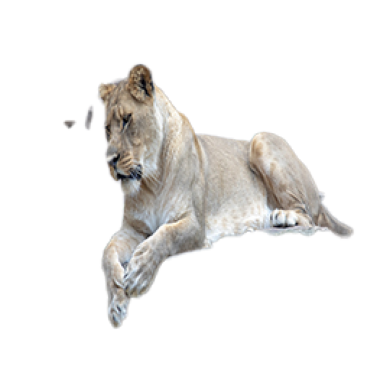

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

In [109]:
# img=transforms(img)
# img=img.unsqueeze(0)
# prediction = simplenet(img)
# prediction = prediction.argmax()
# print(prediction)

from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T

labels = ['lion','tiger']
img = Image.open("/content/sample_data/test/class_1/180.png")
plt.imshow(img)  # Display the image
plt.axis("off")  # Hide axes
plt.show()

# Convert the PIL Image to a Tensor Image before applying transforms
img = T.ToTensor()(img) # Call ToTensor directly on the image
# img = transforms(img)  # Apply the remaining transforms # The error line
# Instead of calling 'transforms' (which is a module), call the transform functions directly or your composed transforms
img = transforms.Compose([
    transforms.Resize(64),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])(img)  # Apply the transformations
img = img.unsqueeze(0)  # Add batch dimension
prediction = simplenet(img)
prediction = prediction.argmax()
print(prediction)

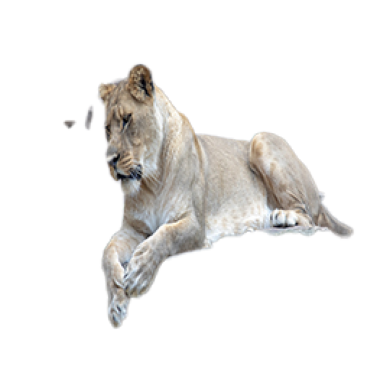

tensor(1)


In [113]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T

labels = ['lion', 'tiger']
img = Image.open("/content/sample_data/test/class_1/180.png")
plt.imshow(img)  # Display the image
plt.axis("off")  # Hide axes
plt.show()

# Convert the PIL Image to a Tensor Image before applying transforms
img = T.ToTensor()(img)  # Call ToTensor directly on the image

# Convert the 4-channel image to 3-channel (remove alpha channel)
img = img[:3, :, :]  # Select only the first 3 channels (RGB)

img = transforms.Compose([
    transforms.Resize(64),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])(img)  # Apply the transformations

img = img.unsqueeze(0)  # Add batch dimension
prediction = simplenet(img)
prediction = prediction.argmax()
print(prediction)

In [ ]:
#from PIL import Image
# labels =['cat','fish']
# IMG_EXTENSIONS = ['.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif']
# def is_image_file(filename):
#   return any(filename.endswith(extension) for extension in IMG_EXTENSIONS)